Obs 0932190601 source 002. Not first X-ray detection. (268.0359, -27.1746, 0.57")

SIMBAD HD 314680B
+ Star
+ Parallax 4.1476. Distance 241 pc.

ALSO XMM
+ 0932190601 src 2

Vizier - Gaia 4063715162892775936 1.29"
+ Parallax 4.1476. Distance 241 pc.
+ Teff unknown
+ Rstar unknown
+ Mstar unknown

Vizier - Gaia 4063715158589050112 2.80" (SIMBAD HD 314680)
+ Parallax 4.3623. Distance 229 pc.
+ Teff 6350K
+ Rstar 1.91
+ Mstar 1.39


In [1]:
%load_ext wurlitzer
import numpy as np
import os
import stingray as st
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [15, 8]

lc = fits.open('0932190601_002/0932190601_PN2_dt1.lc')
bkg = fits.open('0932190601_002/0932190601_PN2_dt1_bkg.lc')
full_gti = []
for j in lc[2].data:
    full_gti.append([j[0],j[1]])
soft = fits.open('0932190601_002/0932190601_PN2_dt1_0.2-2keV.lc')
sbkg = fits.open('0932190601_002/0932190601_PN2_dt1_0.2-2keV_bkg.lc')
soft_gti = []
for j in soft[2].data:
    soft_gti.append([j[0],j[1]])
hard = fits.open('0932190601_002/0932190601_PN2_dt1_2-12keV.lc')
hbkg = fits.open('0932190601_002/0932190601_PN2_dt1_2-12keV_bkg.lc')
hard_gti = []
for j in hard[2].data:
    hard_gti.append([j[0],j[1]])

In [2]:
full_lc = st.Lightcurve(lc[1].data.field('TIME'),lc[1].data.field('RATE'),err=lc[1].data.field('ERROR'),gti=full_gti,input_counts=False)
full_bkg = st.Lightcurve(bkg[1].data.field('TIME'),bkg[1].data.field('RATE'),err=bkg[1].data.field('ERROR'),gti=full_gti,input_counts=False)

soft_lc = st.Lightcurve(soft[1].data.field('TIME'),soft[1].data.field('RATE'),err=soft[1].data.field('ERROR'),gti=soft_gti,input_counts=False)
soft_bkg = st.Lightcurve(sbkg[1].data.field('TIME'),sbkg[1].data.field('RATE'),err=sbkg[1].data.field('ERROR'),gti=soft_gti,input_counts=False)

hard_lc = st.Lightcurve(hard[1].data.field('TIME'),hard[1].data.field('RATE'),err=hard[1].data.field('ERROR'),gti=hard_gti,input_counts=False)
hard_bkg = st.Lightcurve(hbkg[1].data.field('TIME'),hbkg[1].data.field('RATE'),err=hbkg[1].data.field('ERROR'),gti=hard_gti,input_counts=False)

full_lc.apply_gtis()
full_bkg.apply_gtis()
soft_lc.apply_gtis()
soft_bkg.apply_gtis()
hard_lc.apply_gtis()
hard_bkg.apply_gtis()

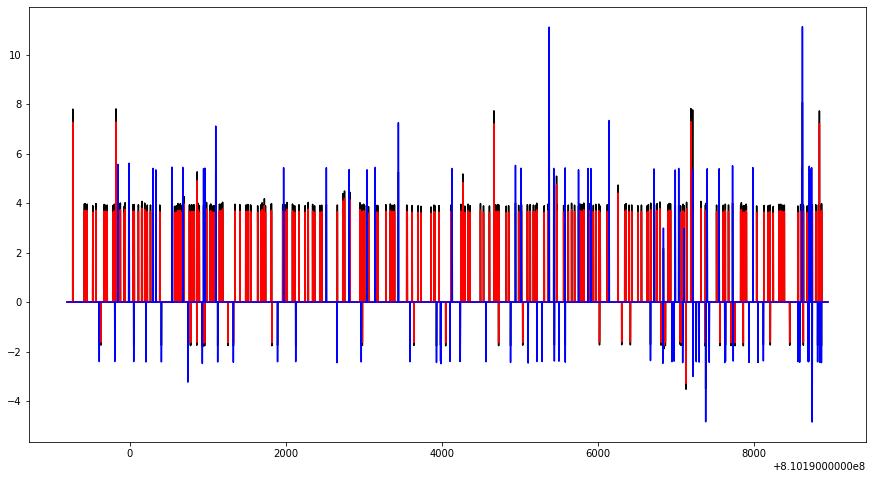

In [3]:
plt.plot(full_lc.time,full_lc.countrate,color='k')
plt.plot(soft_lc.time,soft_lc.countrate,color='r')
plt.plot(hard_lc.time,hard_lc.countrate,color='b')

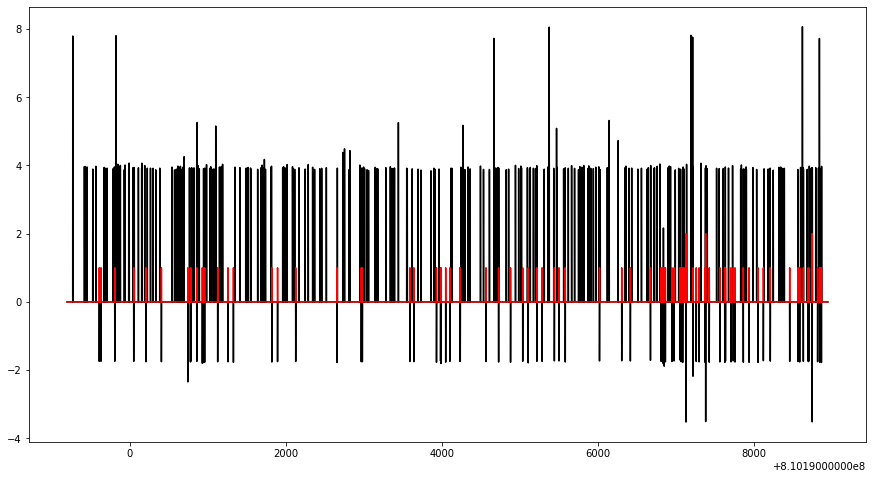

In [4]:
plt.plot(full_lc.time,full_lc.countrate,color='k')
plt.plot(full_bkg.time,full_bkg.countrate,color='r')
plt.show()

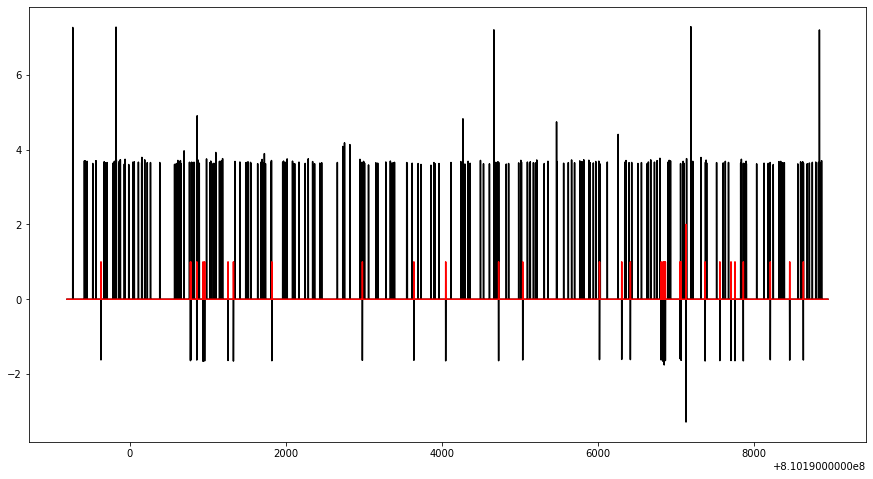

In [5]:
plt.plot(soft_lc.time,soft_lc.countrate,color='k')
plt.plot(soft_bkg.time,soft_bkg.countrate,color='r')
plt.show()

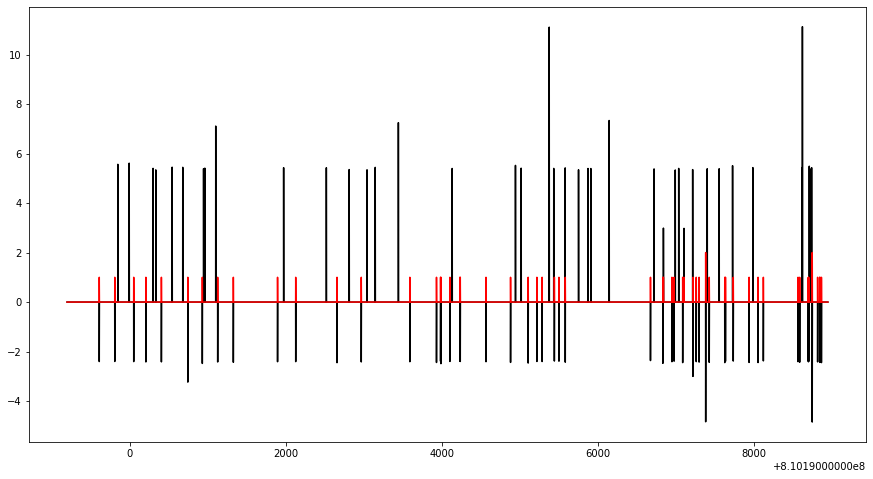

In [6]:
plt.plot(hard_lc.time,hard_lc.countrate,color='k')
plt.plot(hard_bkg.time,hard_bkg.countrate,color='r')
plt.show()

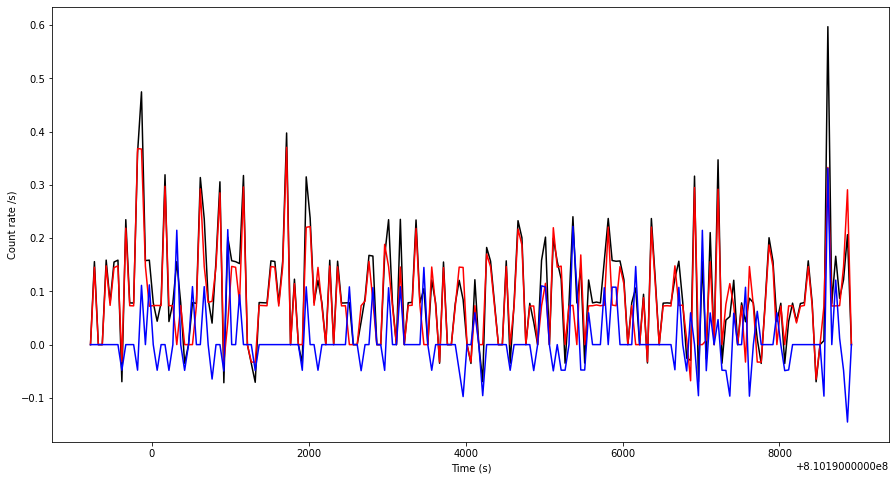

In [7]:
plt.plot(full_lc.rebin(50).time,full_lc.rebin(50).countrate,color='k')
plt.plot(soft_lc.rebin(50).time,soft_lc.rebin(50).countrate,color='r')
plt.plot(hard_lc.rebin(50).time,hard_lc.rebin(50).countrate,color='b')
plt.xlabel('Time (s)')
plt.ylabel('Count rate /s)')
plt.savefig('0932190601_002/0932190601_002_dt50lc.png')

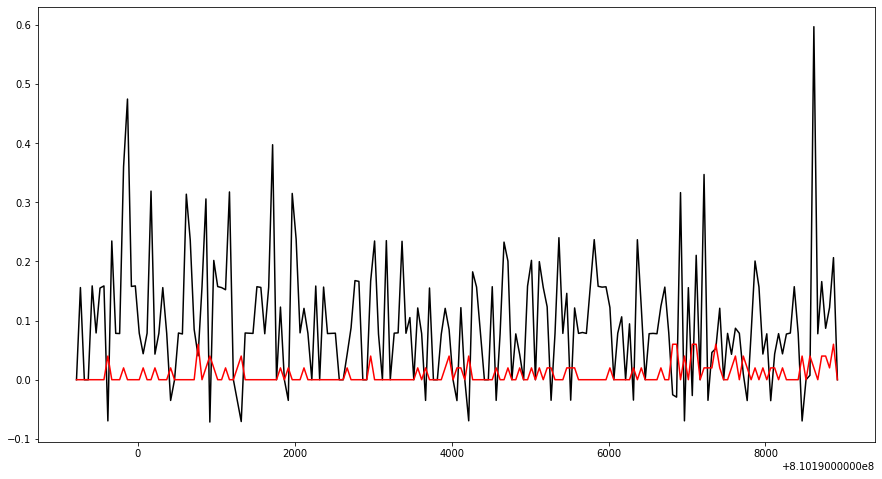

In [8]:
plt.plot(full_lc.rebin(50).time,full_lc.rebin(50).countrate,color='k')
plt.plot(full_bkg.rebin(50).time,full_bkg.rebin(50).countrate,color='r')
plt.show()

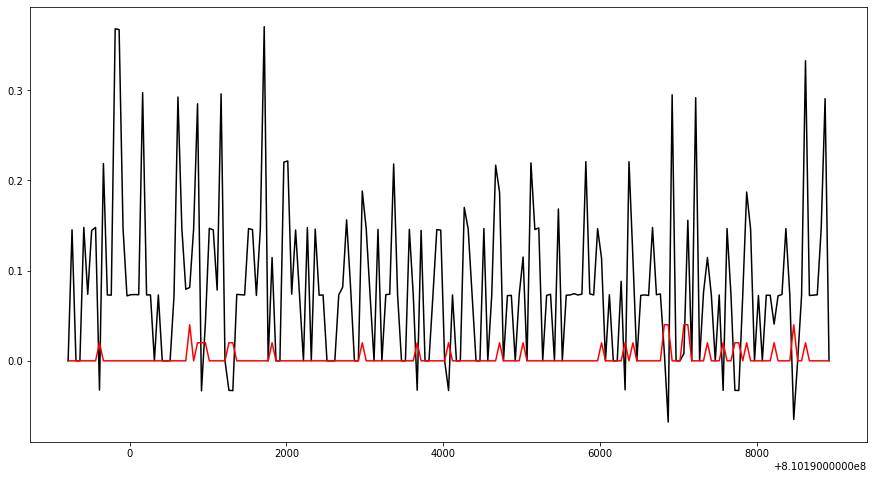

In [9]:
plt.plot(soft_lc.rebin(50).time,soft_lc.rebin(50).countrate,color='k')
plt.plot(soft_bkg.rebin(50).time,soft_bkg.rebin(50).countrate,color='r')
plt.show()

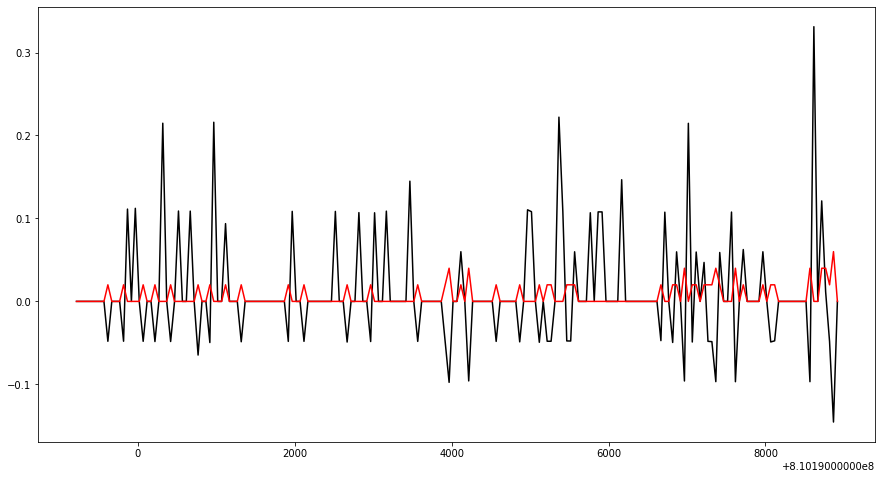

In [10]:
plt.plot(hard_lc.rebin(50).time,hard_lc.rebin(50).countrate,color='k')
plt.plot(hard_bkg.rebin(50).time,hard_bkg.rebin(50).countrate,color='r')
plt.show()

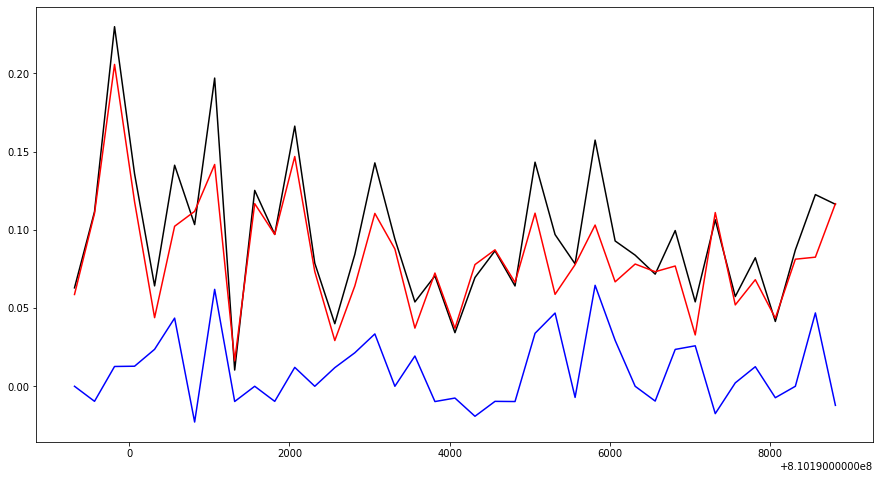

In [11]:
plt.plot(full_lc.rebin(250).time,full_lc.rebin(250).countrate,color='k')
plt.plot(soft_lc.rebin(250).time,soft_lc.rebin(250).countrate,color='r')
plt.plot(hard_lc.rebin(250).time,hard_lc.rebin(250).countrate,color='b')

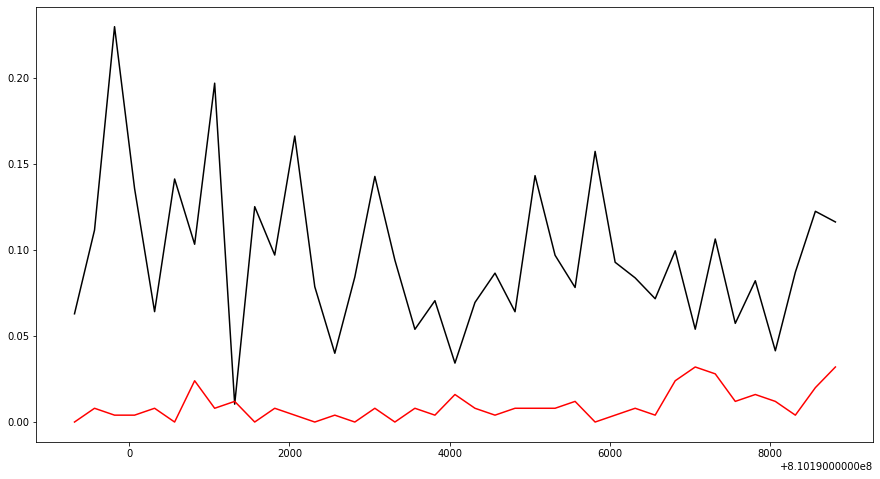

In [12]:
plt.plot(full_lc.rebin(250).time,full_lc.rebin(250).countrate,color='k')
plt.plot(full_bkg.rebin(250).time,full_bkg.rebin(250).countrate,color='r')
plt.show()

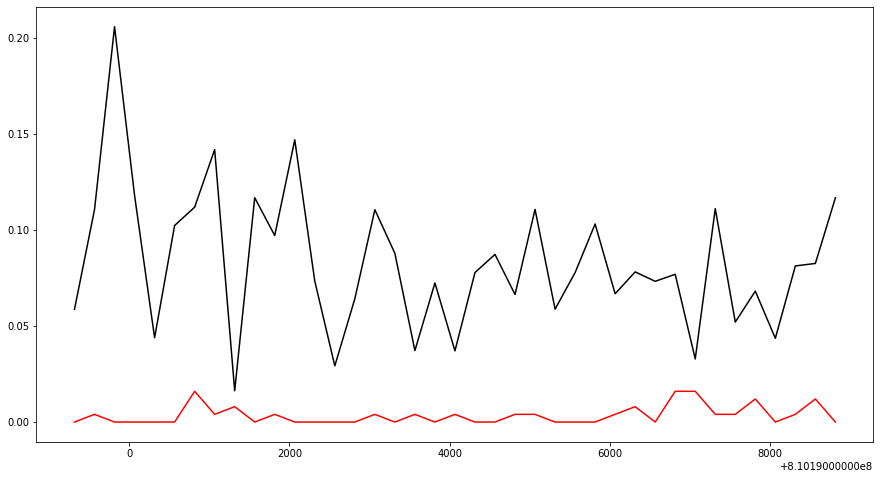

In [13]:
plt.plot(soft_lc.rebin(250).time,soft_lc.rebin(250).countrate,color='k')
plt.plot(soft_bkg.rebin(250).time,soft_bkg.rebin(250).countrate,color='r')
plt.show()

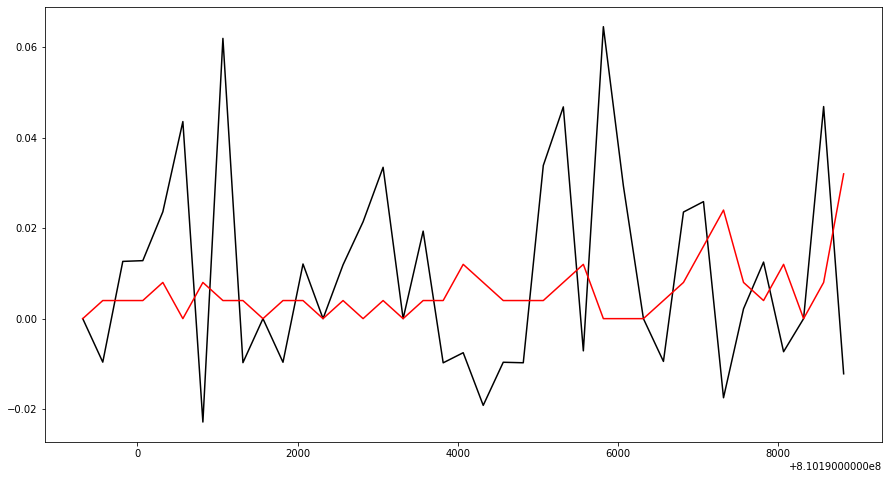

In [14]:
plt.plot(hard_lc.rebin(250).time,hard_lc.rebin(250).countrate,color='k')
plt.plot(hard_bkg.rebin(250).time,hard_bkg.rebin(250).countrate,color='r')
plt.show()

In [15]:
os.chdir("0932190601_002")
spec = Spectrum("0932190601_PN2grpspec.fits")


1 spectrum  in use
 
Spectral Data File: 0932190601_PN2grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.779e-02 +/- 2.008e-03 (84.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-18
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 8738 sec
 Using fit statistic: chi
 Using Background File                0932190601_PN2spec_bkg.fits
  Background Exposure Time: 8738 sec
 Using Response (RMF) File            0932190601_PN2spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0932190601_PN2spec.arf



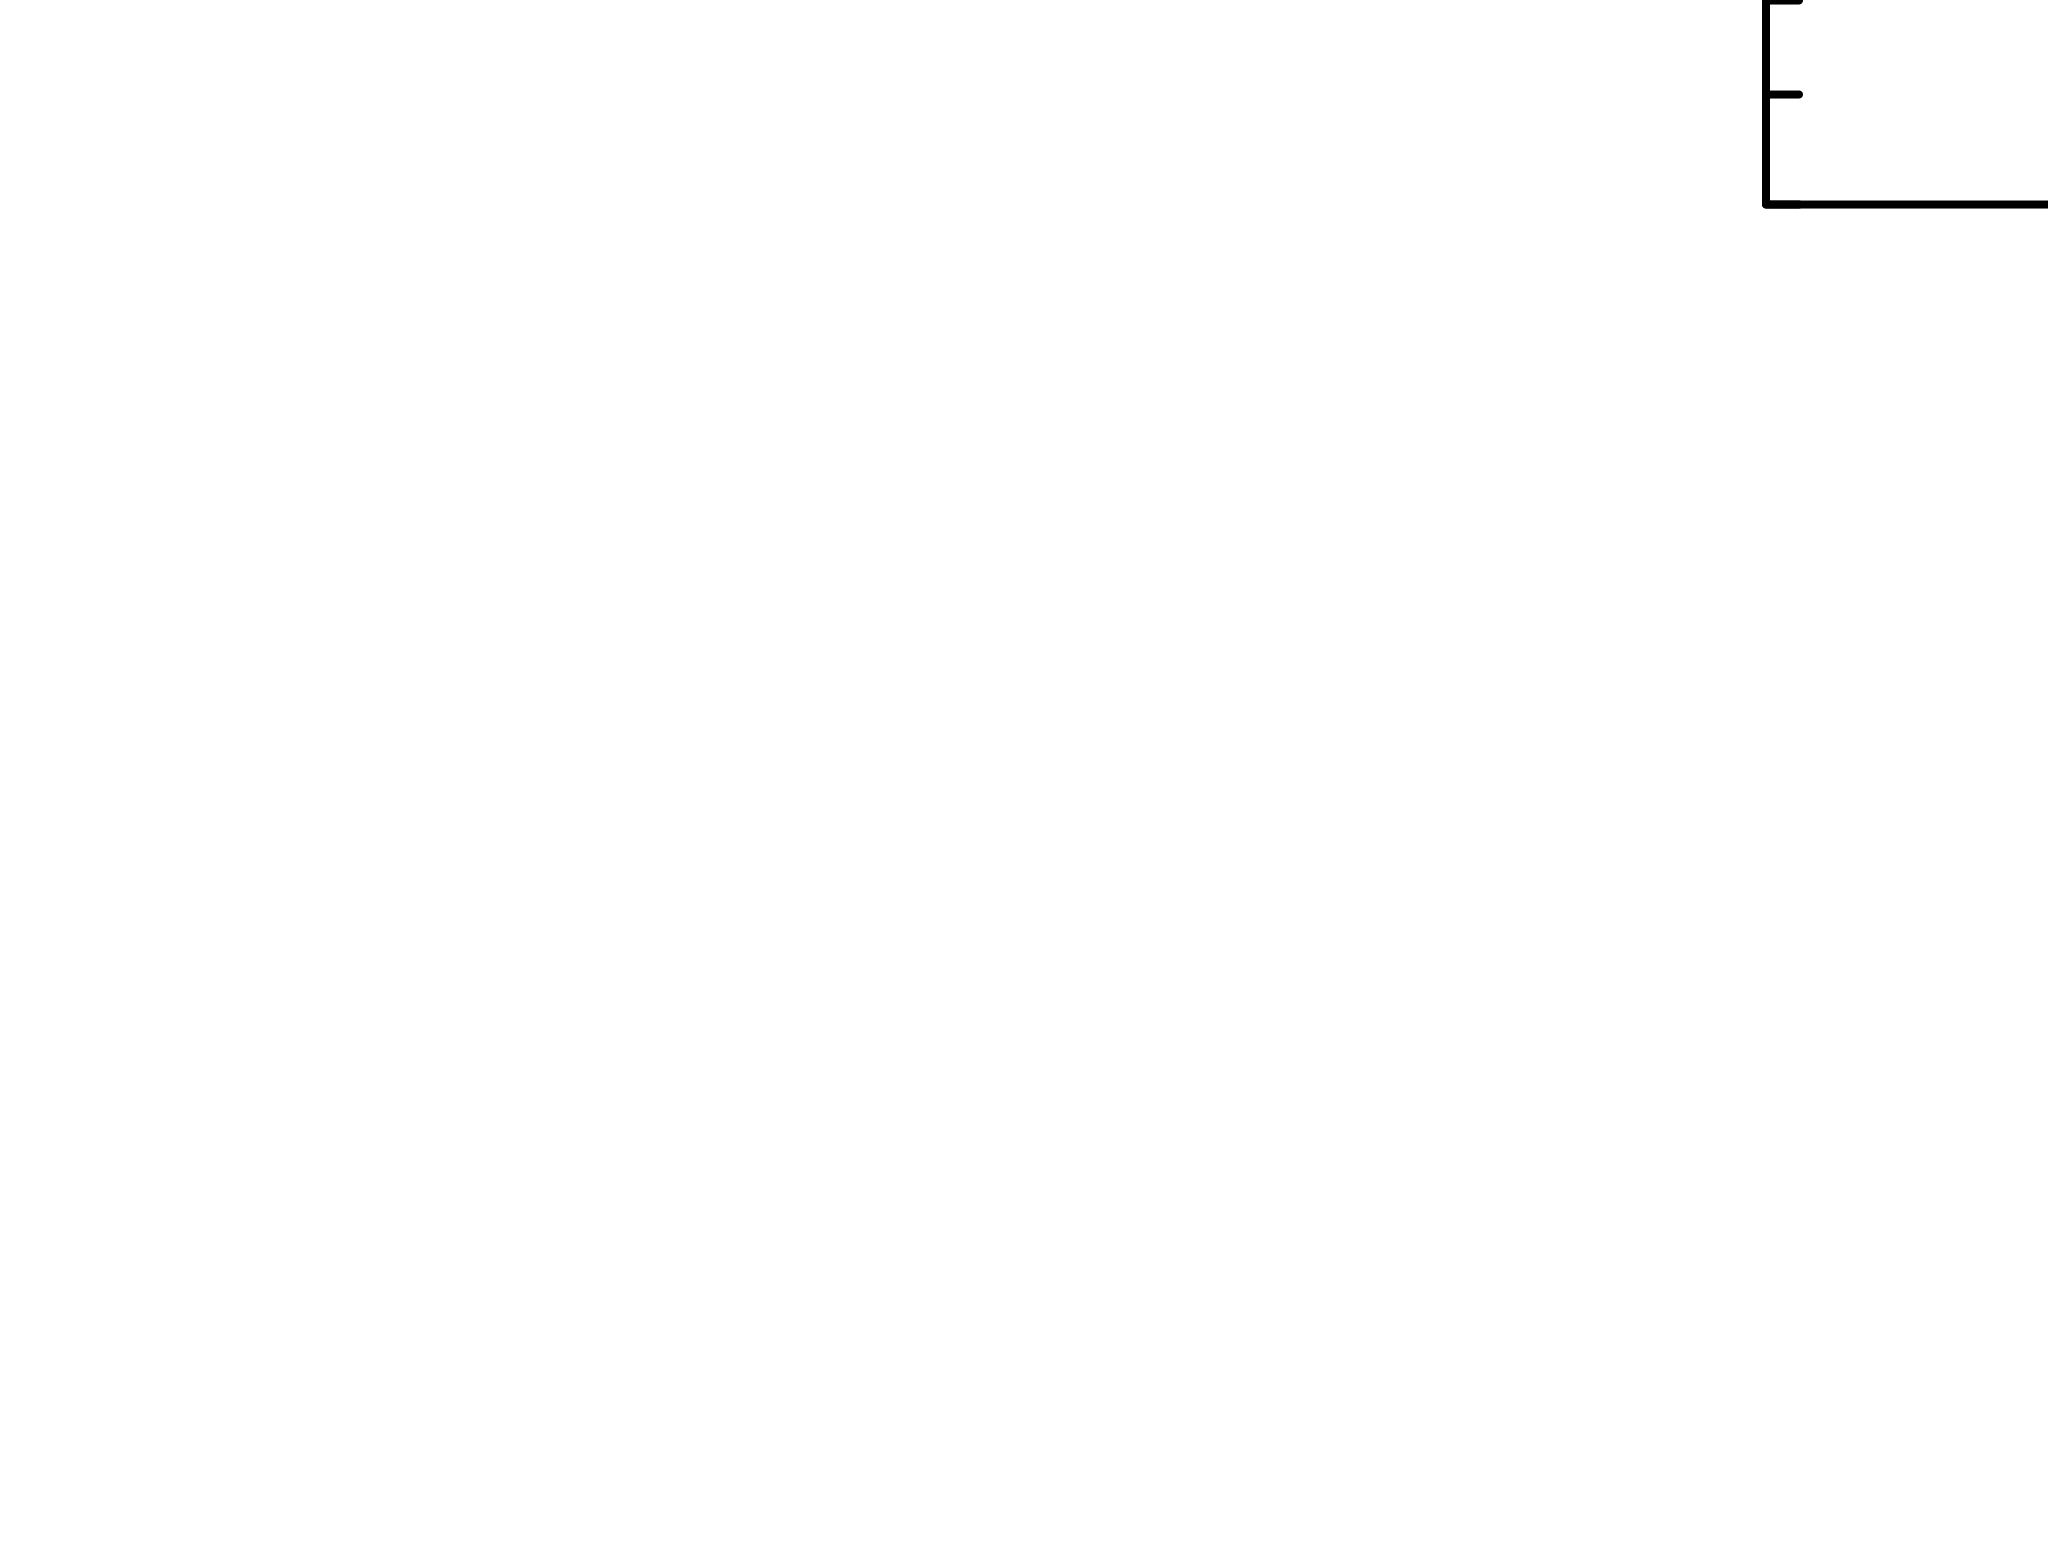

In [16]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.1")
Plot("data")

     1 channels (1) ignored in spectrum #     1
     1 channels (18) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sect

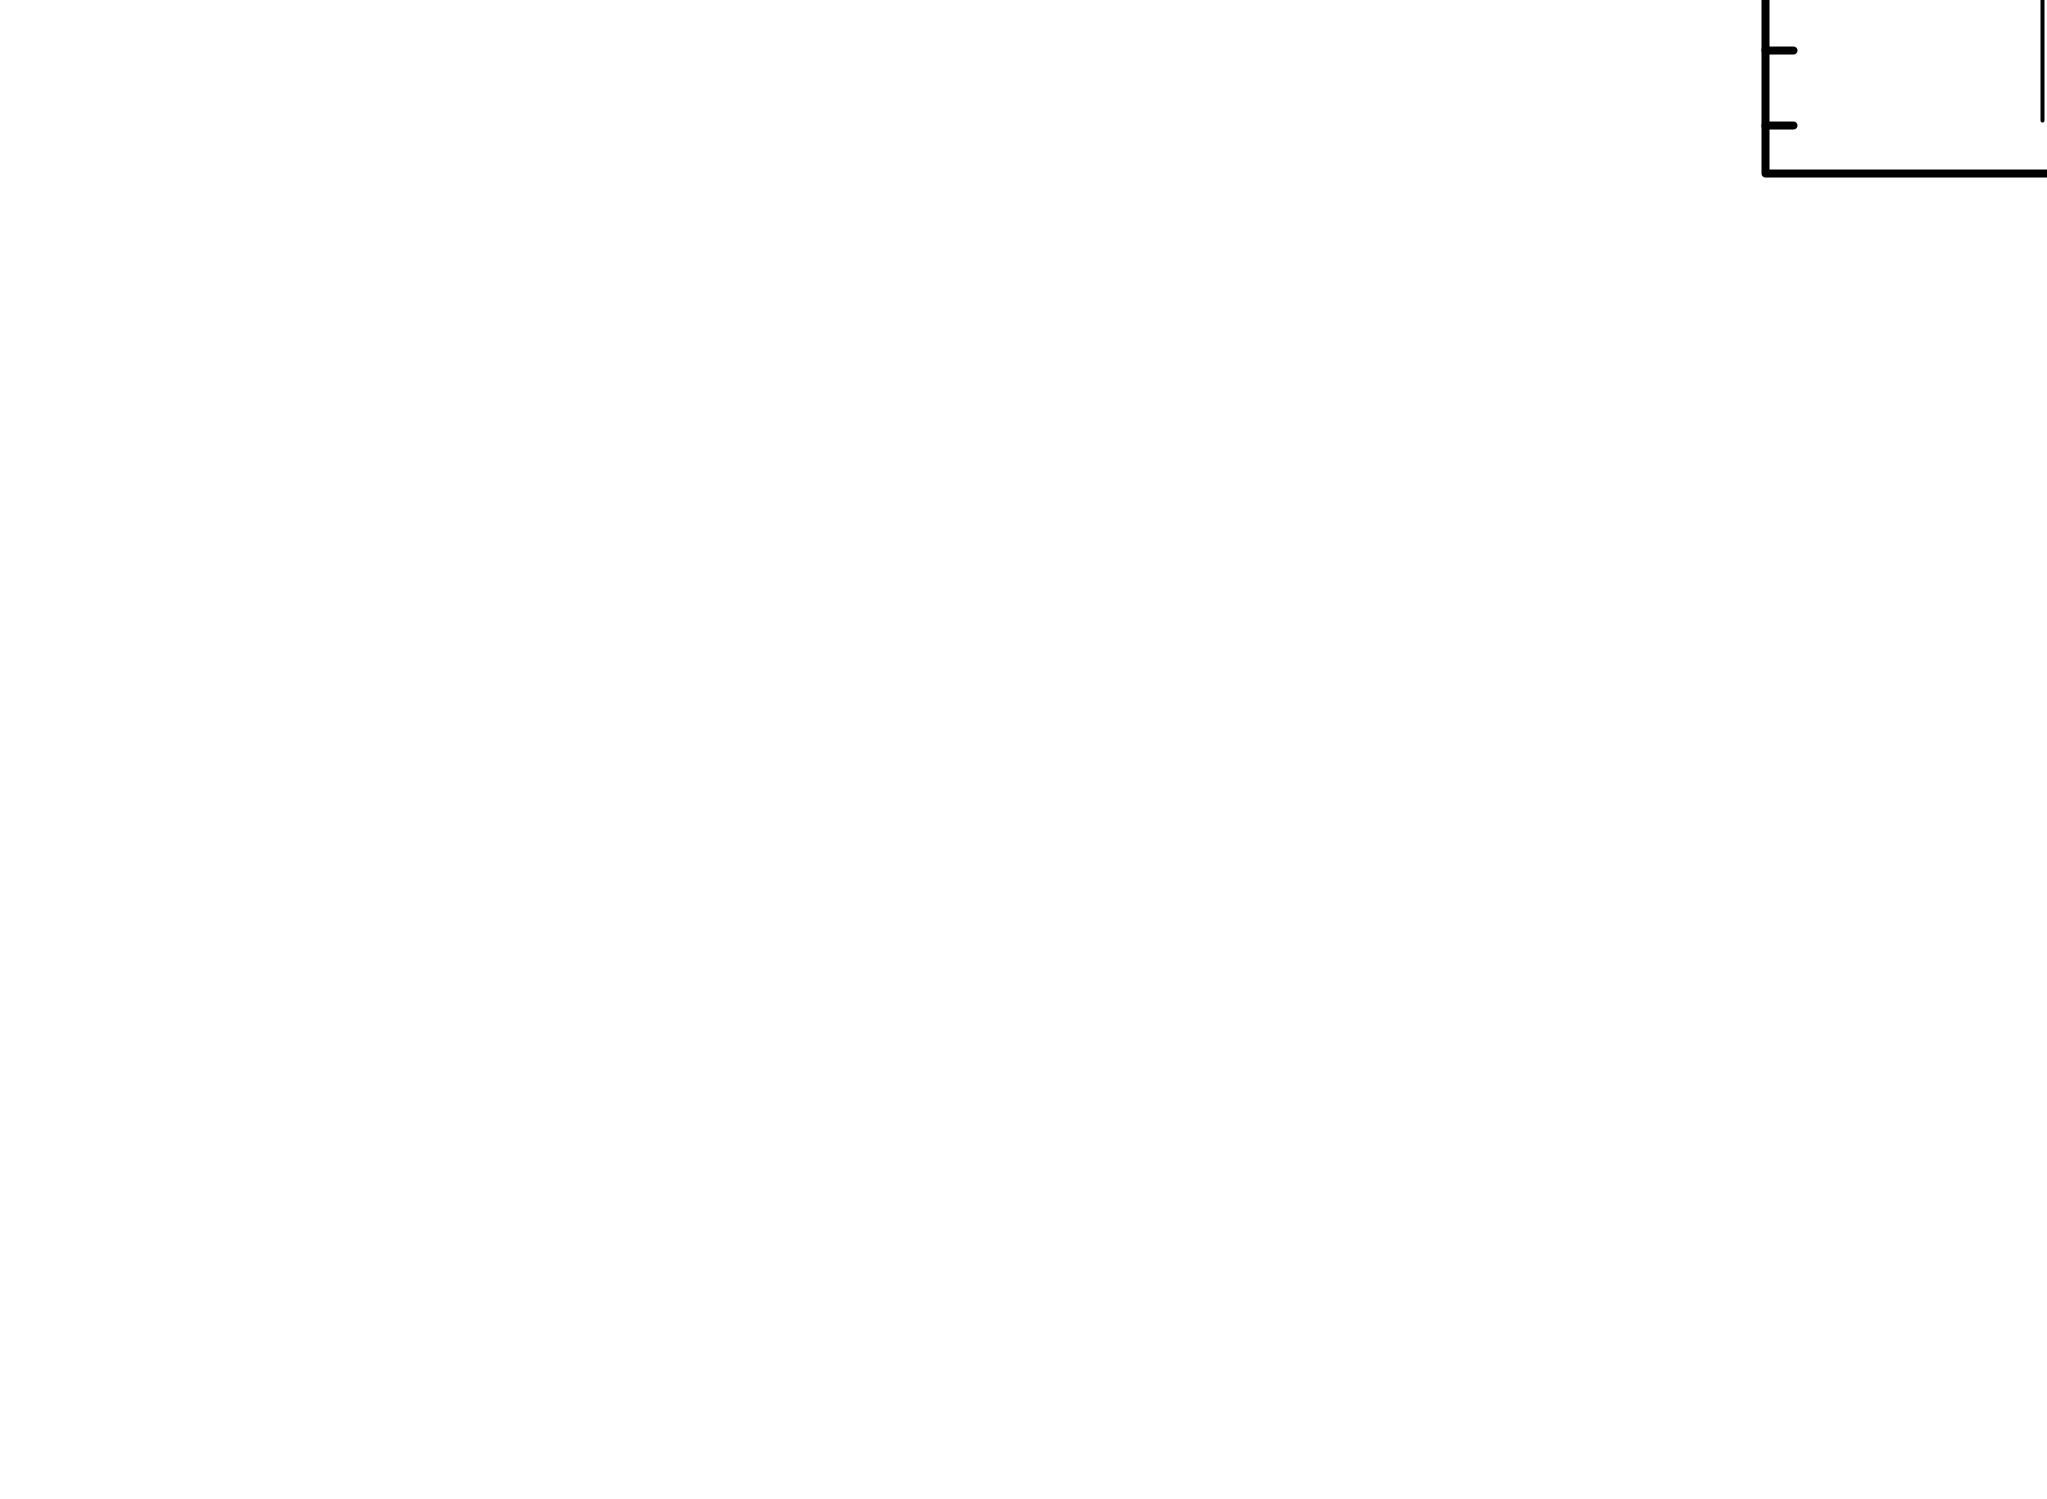

 Model Flux 9.7887e-05 photons (1.0868e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [17]:
spec.ignore("**-0.2 12.0-**")
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.596755e+11     using 16 bins.

Test statistic : Chi-Squared              1.596755e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
180.003      1.98888       0      0.352856       1.29382   7.10894e-06
165.935      376531        0      0.167054       1.71415   7.93679e-06
77.9025      655786       -1     0.0434130       3.36444   1.99732e-0

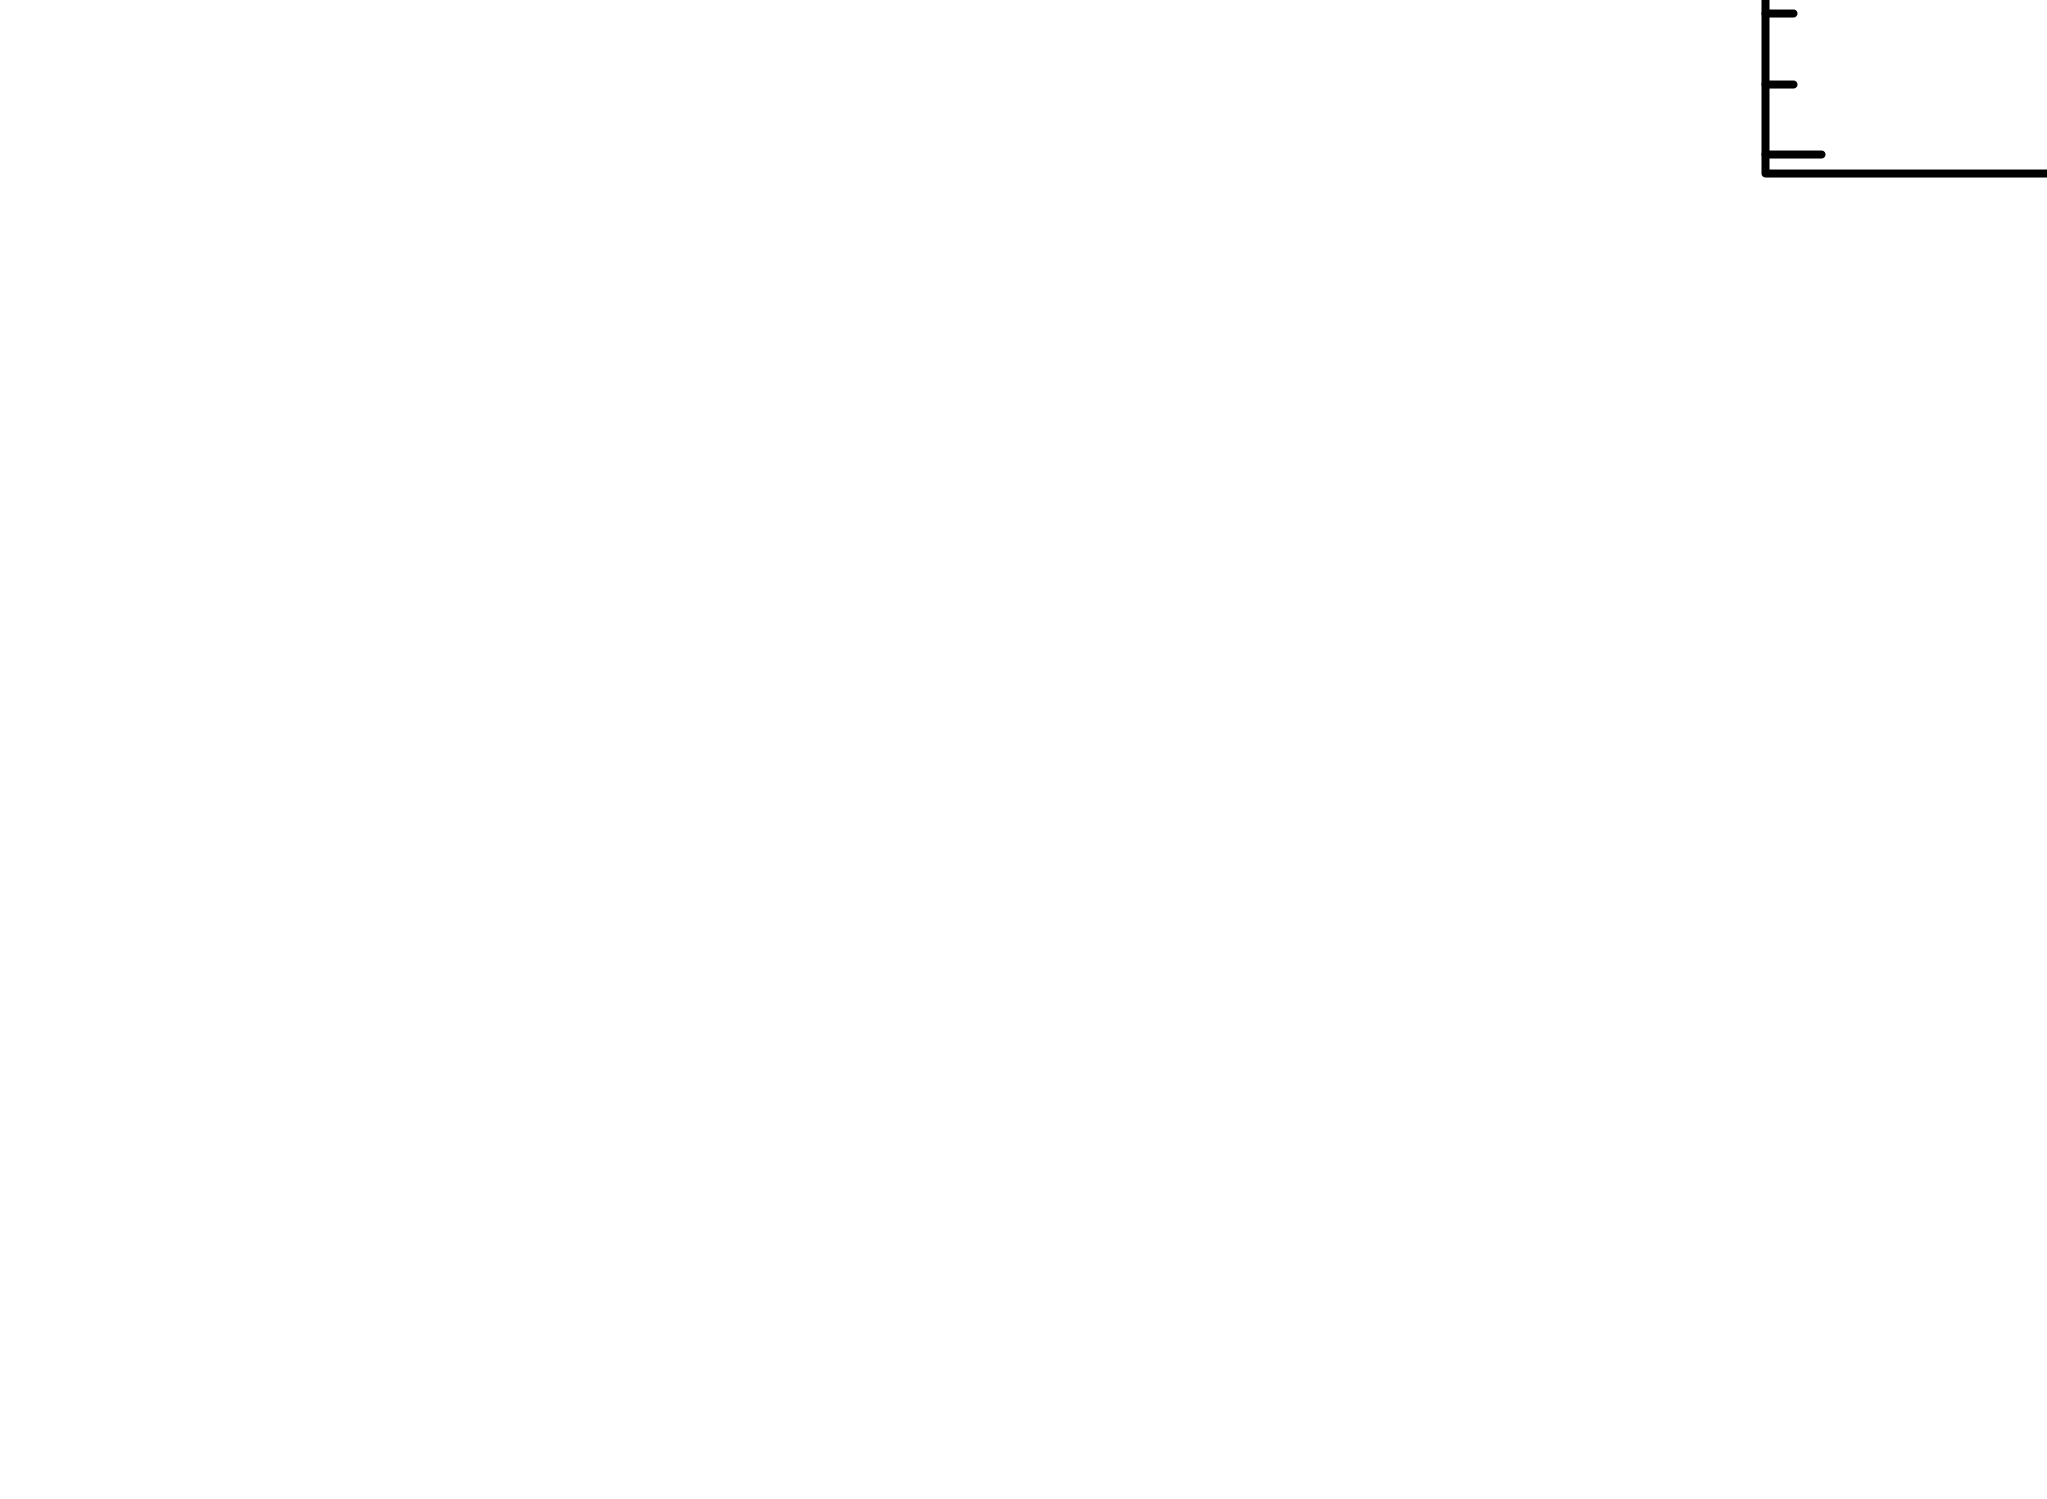

 Model Flux 7.2365e-05 photons (1.0067e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [18]:
mo2 = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")

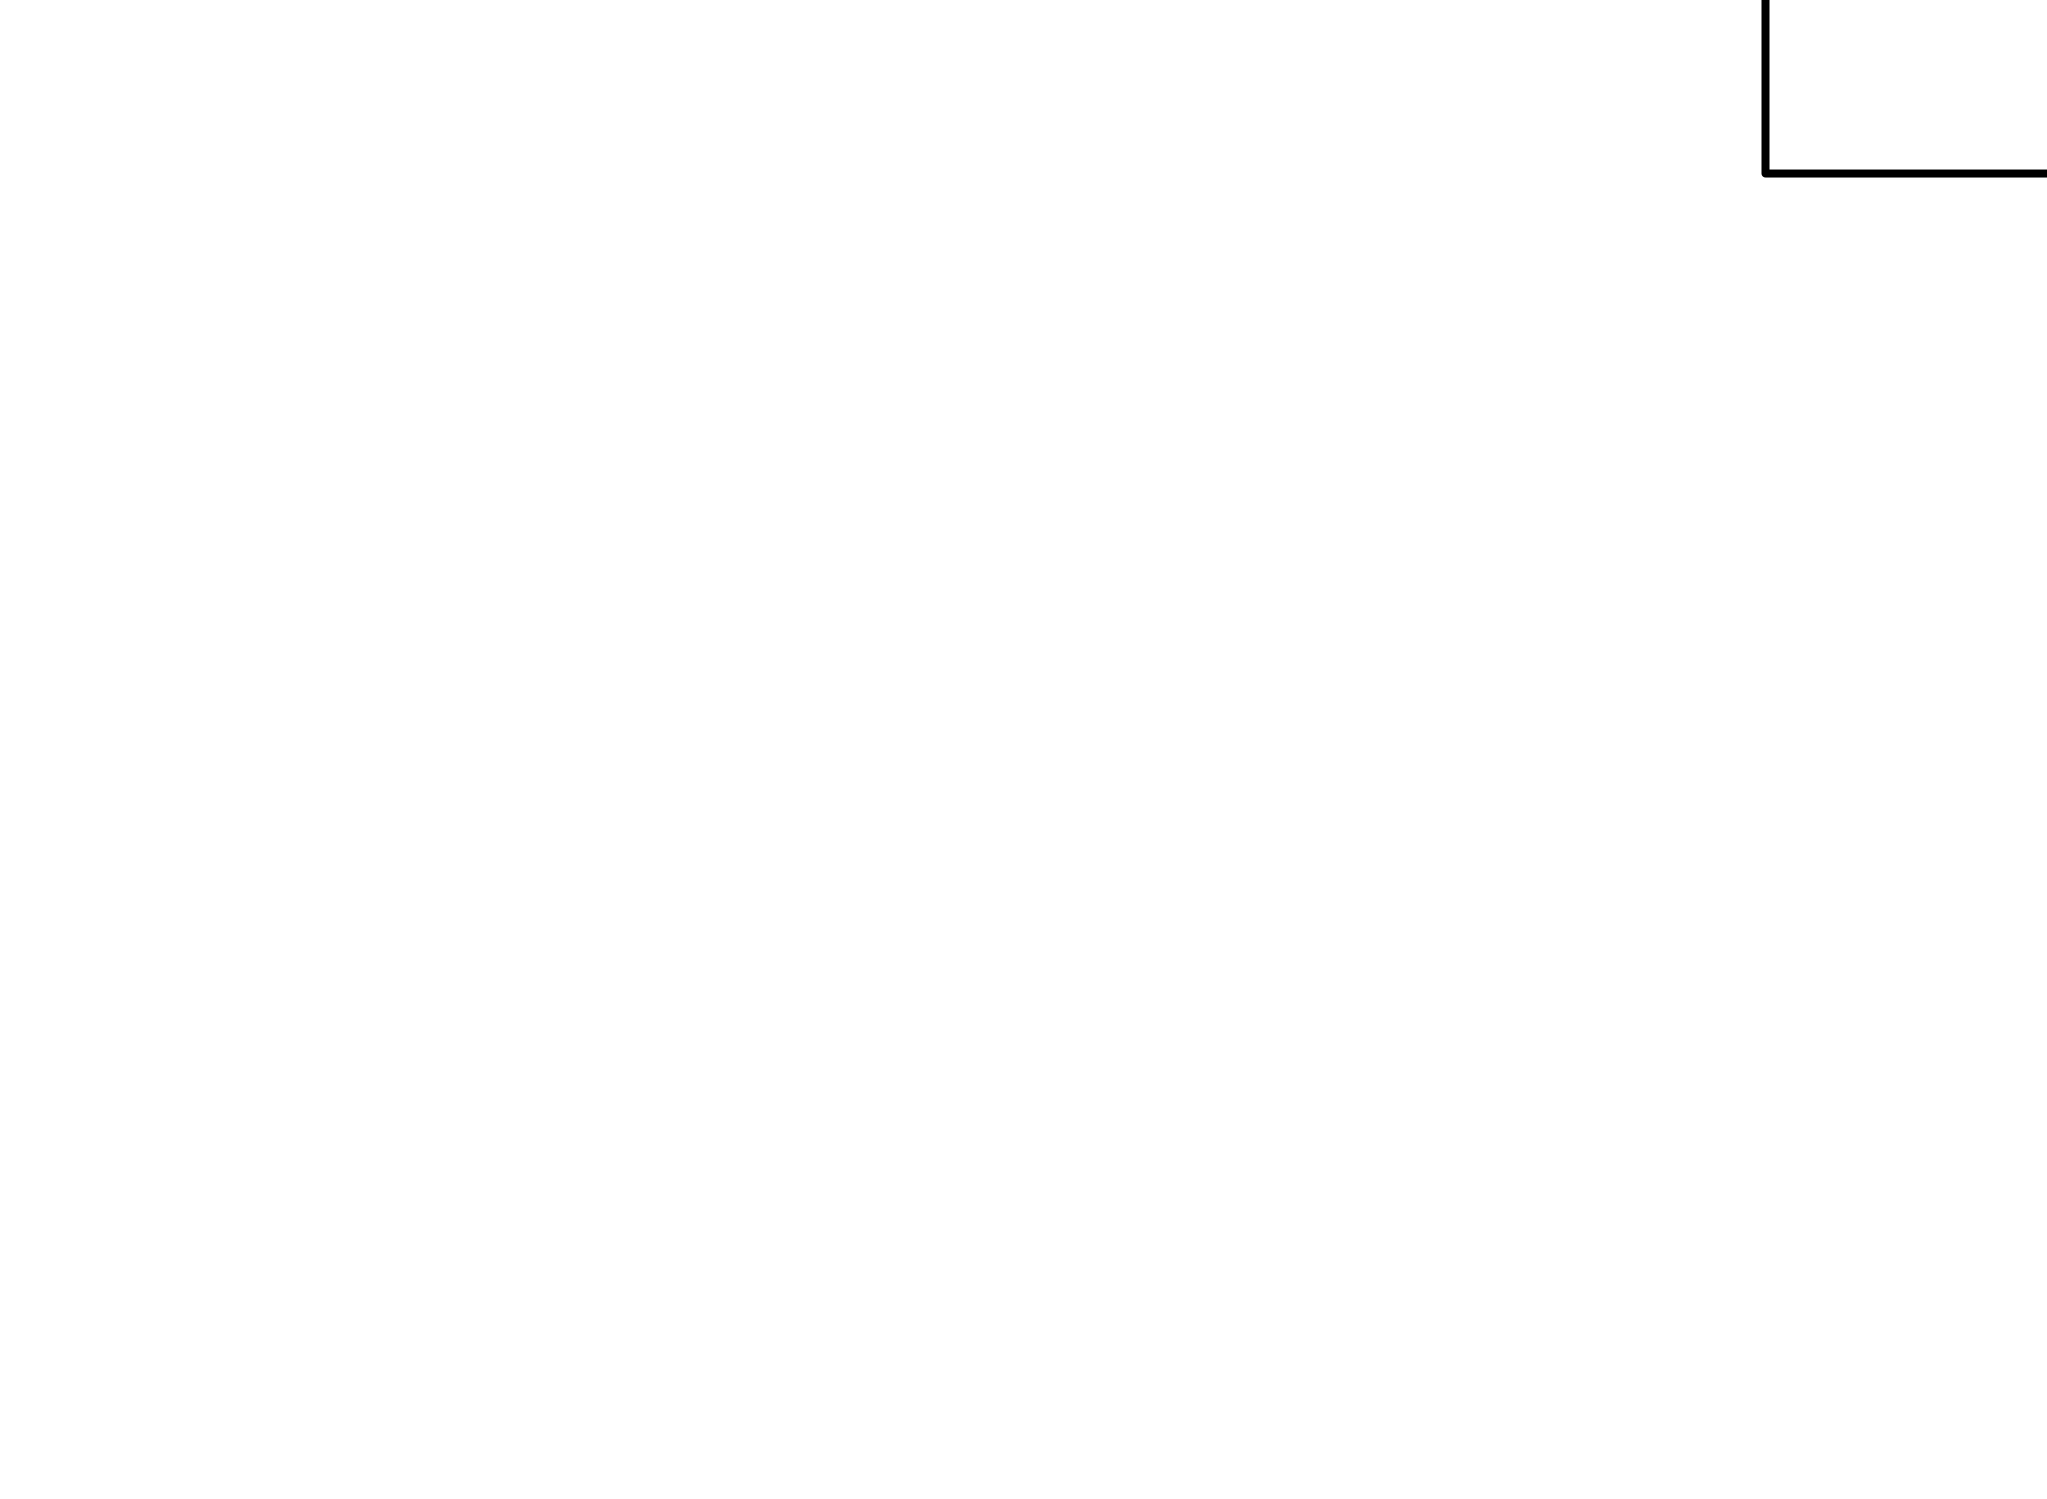


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.123433e+12     using 16 bins.

Test statistic : Chi-Squared              1.123433e+12     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
195.581      86214.3 

In [19]:
mo3 = Model("tbabs*(bbody + powerlaw)")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")

In [20]:
flux = 1.1095*10**-13
d_pc = 241
lum = flux * 4 * np.pi * (d_pc * 3.09* 10**18)**2
print('Luminosity is: '+str(lum)+' erg s^-1')

d_pc = 229
lum = flux * 4 * np.pi * (d_pc * 3.09* 10**18)**2
print('Luminosity is: '+str(lum)+' erg s^-1')

Luminosity is: 7.731935359590879e+29 erg s^-1
Luminosity is: 6.981119853175831e+29 erg s^-1


In [21]:
g_mag = 12.932615
opt_flux = (10**(0.4*(-26.7 - g_mag))) * (3.828 * 10 ** 33) / (4*np.pi*(1.496*10**13)**2)
print('Optical flux: '+str(opt_flux))
opt_x_ratio = flux / opt_flux
print('The x-ray/optical flux ratio is: '+str(opt_x_ratio))

Optical flux: 1.909206384599104e-10
The x-ray/optical flux ratio is: 0.0005811315156653288
